In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.interpolate import CubicHermiteSpline

# Zadanie 5
Analiza trendów cen akcji. Zastosuj metodę interpolacji kubicznej Hermite'a do analizy
trendów cen akcji z dużego zbioru danych giełdowych. Zidentyfikuj lokalne maksima i minima w cenach akcji oraz przewidywane zmiany trendów. Porównaj różne stopnie interpolacji i oceń ich wpływ na dokładność analizy trendów.

In [39]:
# Pobranie danych z yahoo finance i wstawienie do pandas dataframe
data = yf.download('META', start='2015-01-01', end='2024-01-01')
# Nazwy kolumn tworzymy na podstawie pierwszego rekordu
data = data.reset_index()
data = data[['Date', 'Close']]
data.head()
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data

[*********************100%%**********************]  1 of 1 completed


,Date,Close
0,2015-01-02,78.449997
1,2015-01-05,77.190002
2,2015-01-06,76.150002
3,2015-01-07,76.150002
4,2015-01-08,78.180000
...,...,...
2259,2023-12-22,353.390015
2260,2023-12-26,354.829987
2261,2023-12-27,357.829987
2262,2023-12-28,358.320007


Text(0, 0.5, 'Close Price')

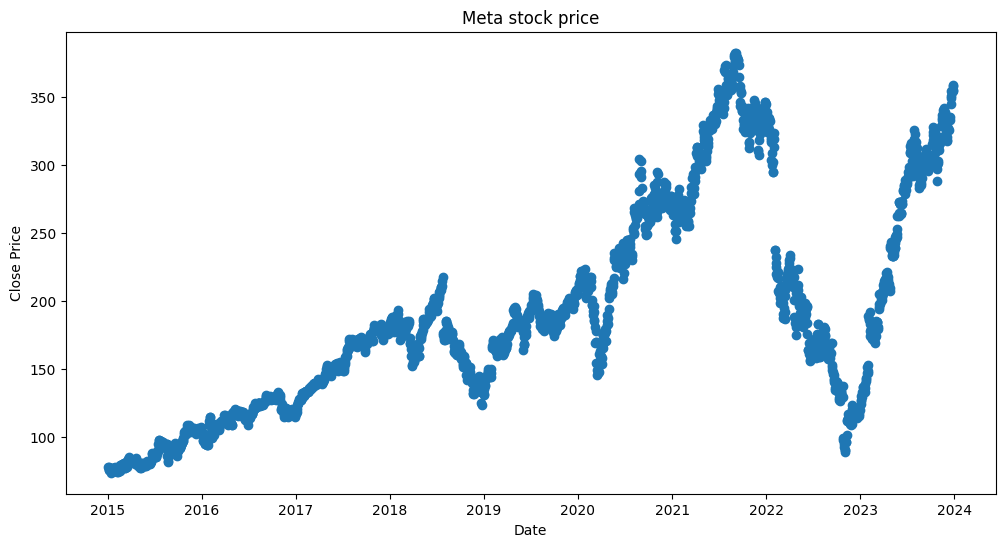

In [40]:
# Wizualizacja Danych
plt.figure(figsize=(12,6))
plt.scatter(data['Date'], data['Close'])
plt.title('Meta stock price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Interpolacja kubiczna Hermite'a
Dane które otrzymaliśmy już teraz posiada "dziury" w danych, które musimy uzupełnić. W tym celu użyjemy interpolacji kubicznej Hermite

In [41]:
# Tworzenie kopii danych
temp = []
n = 3
for i in range(n):
    temp.append(data.copy())
temp[0].head()

,Date,Close
0,2015-01-02,78.449997
1,2015-01-05,77.190002
2,2015-01-06,76.150002
3,2015-01-07,76.150002
4,2015-01-08,78.180000


IndexError: list index out of range

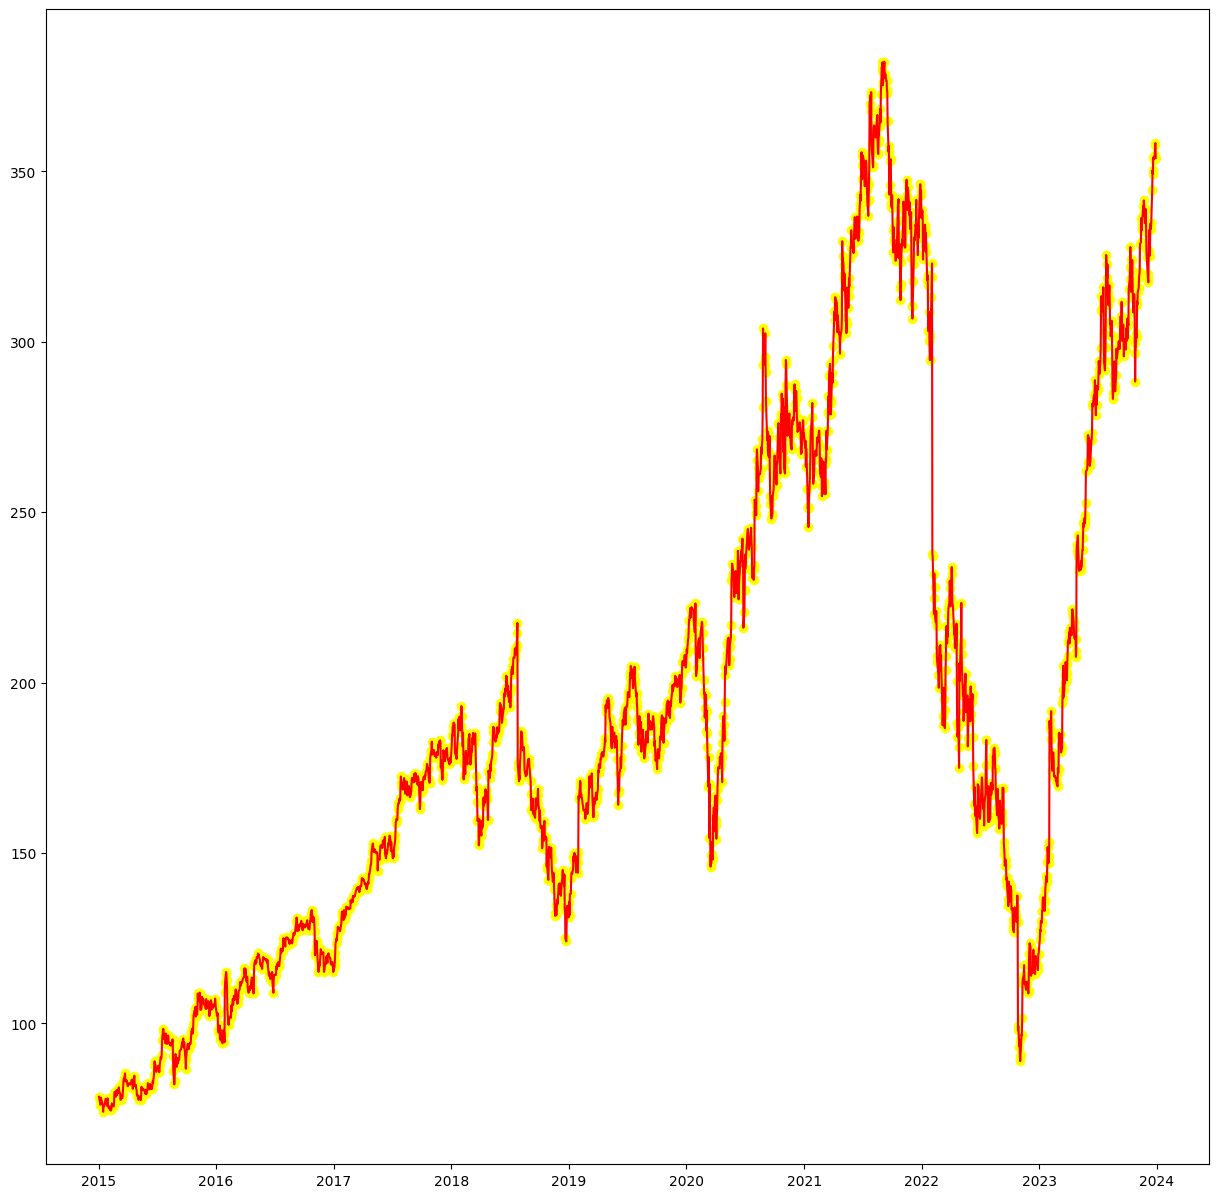

In [47]:
# Wymiary wykresów
plt.rcParams['figure.figsize'] = [15, 15]
# Funkcja interpolacji liniowej
temp[1]['Close'] = temp[0]['Close'].interpolate(method='cubicspline', order=3)
# Wizualizacja danych po interpolacji
plt.plot(temp[0]['Date'], temp[0]['Close'], color='red')
plt.scatter(data['Date'], data['Close'], color='yellow')
# ustaw grubość lini zielonej na 0.5
plt.setp(plt.gca().get_lines()[0], linewidth=1.5)
plt.setp(plt.gca().get_lines()[1], linewidth=0.6)

In [48]:
# Obliczenie dokładności za pomocą metody MSE
# Funkcja MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Obliczenie dokładności
print('Dokładność interpolacji Kubicznej:', mean_squared_error(temp[0]['Close'], data['Close']))

Dokładność interpolacji Kubicznej: 0.0
